## PROJECT 04

### MUKESH KANNA M K

# 1. Import required libraries and read the dataset.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

In [34]:
os.getcwd()

'C:\\Users\\Admin\\Desktop\\program'

In [35]:
data=pd.read_csv("Apps_data.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [36]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [37]:
data.shape

(10841, 13)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [39]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [40]:
data.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [41]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#  4. Check if there are any duplicate records in the dataset? if any drop them. 

In [42]:
data.duplicated().sum()

483

In [43]:
data.drop_duplicates(keep="first",inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [44]:
unique_category=data.Category.unique()
unique_category

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [45]:
#data.Category.drop(data[data.Category=="1.9"],inplace=True)

In [46]:
data[data.Category=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [47]:
data[data.Category=="1.9"].index

Int64Index([10472], dtype='int64')

In [48]:
data.drop(10472,inplace=True)


In [49]:
data.shape

(10357, 13)

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [50]:
data.Rating.isnull().sum()

1465

In [51]:
data.Rating.dropna(inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [52]:
m=data[data["Rating"].isna()].index

In [53]:
data.drop(m, inplace=True)

In [54]:
data[data.Rating==np.nan]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [55]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [56]:
def a(value):
    if value>3.5:
        return 'high'
    else:
        return 'low'

In [57]:
data["Rating_category"]=data['Rating'].map(a)
data["Rating_category"]

0        high
1        high
2        high
3        high
4        high
         ... 
10834    high
10836    high
10837    high
10839    high
10840    high
Name: Rating_category, Length: 8892, dtype: object

In [58]:
data[data.Rating_category=='low']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,low
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1.1M,"100,000+",Free,0,Everyone,Auto & Vehicles,"April 27, 2018",1.4,4.0.3 and up,low
159,Cloud of Books,BOOKS_AND_REFERENCE,3.3,1862,19M,"1,000,000+",Free,0,Everyone,Books & Reference,"April 27, 2018",2.2.5,4.1 and up,low
176,Free Book Reader,BOOKS_AND_REFERENCE,3.4,1680,4.0M,"100,000+",Free,0,Everyone,Books & Reference,"August 20, 2016",3.05,4.0.3 and up,low
184,Azpen eReader,BOOKS_AND_REFERENCE,3.5,156,42M,"500,000+",Free,0,Everyone,Books & Reference,"February 15, 2018",3.1.7.9,2.2 and up,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10757,Fisher-Price® Smart Connect™,TOOLS,2.7,422,72M,"50,000+",Free,0,Everyone,Tools,"February 23, 2018",2.4.1,4.4 and up,low
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,low
10766,FreedomPop Diagnostics,TOOLS,2.9,452,7.0M,"100,000+",Free,0,Everyone,Tools,"July 17, 2017",1.03.123.0713,4.0.3 and up,low
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6M,"5,000+",Free,0,Teen,Books & Reference,"August 5, 2017",0.3.4,4.1 and up,low


# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [59]:
data["Rating_category"].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Rating category')

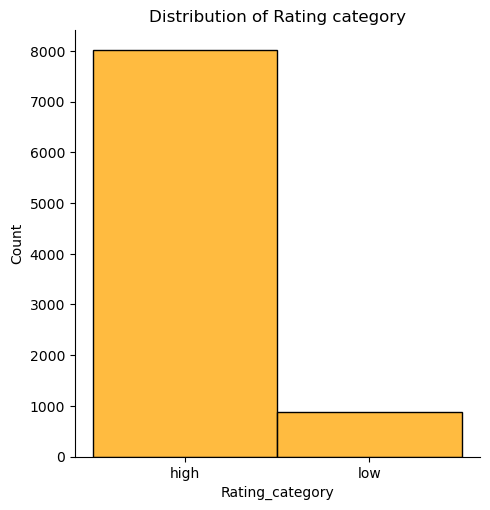

In [61]:
sns.displot(data["Rating_category"],color='orange',common_norm=True)
plt.title("Distribution of Rating category")

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [62]:
data["Reviews"]=data.Reviews.astype("int32")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   int32  
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(1), int32(1), object(12)
memory usage: 1007.3+ KB


In [63]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high


In [64]:
# data["Reviews"].unique().object()

AttributeError: 'numpy.ndarray' object has no attribute 'object'

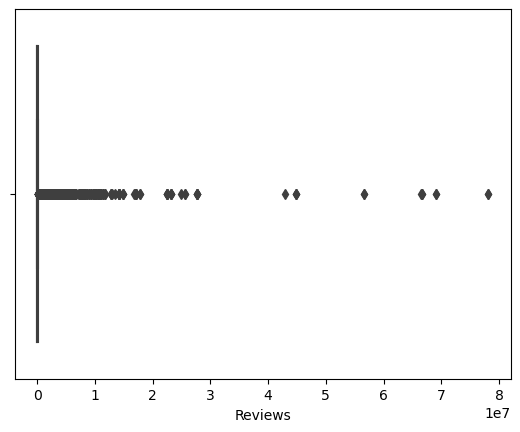

In [65]:
sns.boxplot(x='Reviews',data = data,orient='h')
plt.show()

In [66]:
log10 = np.log10(data["Reviews"])

In [67]:
log10.describe()

count    8892.000000
mean        3.576368
std         1.685149
min         0.000000
25%         2.214844
50%         3.673435
75%         4.852887
max         7.892975
Name: Reviews, dtype: float64

In [68]:
print(log10)

0        2.201397
1        2.985426
2        4.942058
3        5.333737
4        2.985426
           ...   
10834    0.845098
10836    1.579784
10837    0.602060
10839    2.056905
10840    5.600218
Name: Reviews, Length: 8892, dtype: float64


Text(0.5, 1.0, 'BoxPlot after Log transformation.')

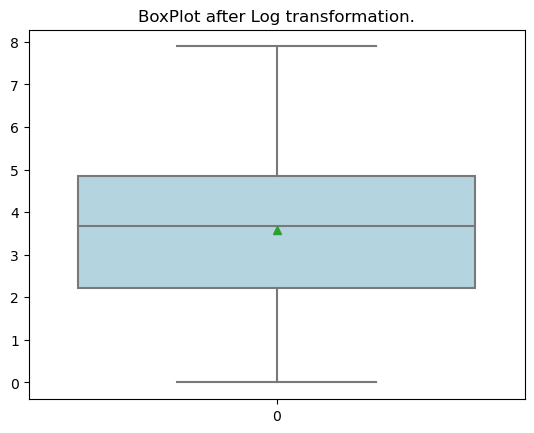

In [69]:
sns.boxplot(log10, color="lightblue" , showmeans = True)
plt.title("BoxPlot after Log transformation.")

In [70]:
data["Reviews"] = log10

In [71]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,0.845098,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,1.579784,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,0.602060,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,2.056905,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high


# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device') 

In [72]:
data.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [73]:
data["Size"] = data["Size"].apply(lambda x : x.replace(",",""))

In [74]:
data.Size=data['Size'].str.replace("M",'000000')

In [75]:
data.Size=data['Size'].str.replace("k",'000')

In [76]:
data.Size

0                  19000000
1                  14000000
2                 8.7000000
3                  25000000
4                 2.8000000
                ...        
10834             2.6000000
10836              53000000
10837             3.6000000
10839    Varies with device
10840              19000000
Name: Size, Length: 8892, dtype: object

In [77]:
data[data['Size']=="Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
37,Floor Plan Creator,ART_AND_DESIGN,4.1,4.563944,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,high
42,Textgram - write on photos,ART_AND_DESIGN,4.4,5.470147,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,high
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,4.231903,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,high
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,4.604345,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,high
68,REPUVE,AUTO_AND_VEHICLES,3.9,2.551450,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3.540455,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,high
10725,Posta App,MAPS_AND_NAVIGATION,3.6,0.903090,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,high
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,2.793790,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,low
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,4.946875,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,high


In [78]:
mk=data[data['Size']=="Varies with device"].index

In [79]:
data.drop(mk,inplace=True)

In [80]:
data.Size.info()

<class 'pandas.core.series.Series'>
Int64Index: 7424 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype 
--------------  ----- 
7424 non-null   object
dtypes: object(1)
memory usage: 116.0+ KB


In [81]:
data["Size"].convert_dtypes()
data.Size

0         19000000
1         14000000
2        8.7000000
3         25000000
4        2.8000000
           ...    
10833       619000
10834    2.6000000
10836     53000000
10837    3.6000000
10840     19000000
Name: Size, Length: 7424, dtype: object

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type. 

In [1]:
data.Installs

NameError: name 'data' is not defined

In [83]:
data.Installs=data.Installs.str.replace("+","")

C:\Users\Admin\AppData\Local\Temp\ipykernel_7700\2604767846.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.Installs=data.Installs.str.replace("+","")


In [ ]:
data.Installs.unique()

In [84]:
data.Installs=data.Installs.str.replace(",","")

In [85]:
data.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: object

In [86]:
data.Installs.convert_dtypes()
data.Installs.info()

<class 'pandas.core.series.Series'>
Int64Index: 7424 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype 
--------------  ----- 
7424 non-null   object
dtypes: object(1)
memory usage: 116.0+ KB


In [87]:
data.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: object

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [88]:
data.Price

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: object

In [89]:
data.Price.unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [90]:
data.Price=data.Price.str.replace("$","")

C:\Users\Admin\AppData\Local\Temp\ipykernel_7700\810052794.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.Price=data.Price.str.replace("$","")


In [91]:
data.Price.unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [92]:
data.Price.convert_dtypes()

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: string

In [93]:
data.Price

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: object

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [94]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7000000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8000000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,1.643453,619000,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,high
10834,FR Calculator,FAMILY,4.0,0.845098,2.6000000,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,1.579784,53000000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,0.602060,3.6000000,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high


In [95]:
data.drop(["App","Rating","Genres","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

In [96]:
data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,2.201397,19000000,10000,Free,0,Everyone,high
1,ART_AND_DESIGN,2.985426,14000000,500000,Free,0,Everyone,high
2,ART_AND_DESIGN,4.942058,8.7000000,5000000,Free,0,Everyone,high
3,ART_AND_DESIGN,5.333737,25000000,50000000,Free,0,Teen,high
4,ART_AND_DESIGN,2.985426,2.8000000,100000,Free,0,Everyone,high
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,1.643453,619000,1000,Free,0,Everyone,high
10834,FAMILY,0.845098,2.6000000,500,Free,0,Everyone,high
10836,FAMILY,1.579784,53000000,5000,Free,0,Everyone,high
10837,FAMILY,0.602060,3.6000000,100,Free,0,Everyone,high


In [97]:
data.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

# 13. Encode the categorical columns. 

In [104]:
data.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   object 
 3   Installs         7424 non-null   object 
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   object 
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(1), object(7)
memory usage: 522.0+ KB


In [106]:
data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,2.201397,19000000,10000,Free,0,Everyone,high
1,ART_AND_DESIGN,2.985426,14000000,500000,Free,0,Everyone,high
2,ART_AND_DESIGN,4.942058,8.7000000,5000000,Free,0,Everyone,high
3,ART_AND_DESIGN,5.333737,25000000,50000000,Free,0,Teen,high
4,ART_AND_DESIGN,2.985426,2.8000000,100000,Free,0,Everyone,high
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,1.643453,619000,1000,Free,0,Everyone,high
10834,FAMILY,0.845098,2.6000000,500,Free,0,Everyone,high
10836,FAMILY,1.579784,53000000,5000,Free,0,Everyone,high
10837,FAMILY,0.602060,3.6000000,100,Free,0,Everyone,high


In [ ]:
There are four categorical column in our data

*category
*Type
*content rating
*rating category

In [108]:
# 1. Category
list(data.Category.unique())

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [109]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Category"] = labelencoder.fit_transform(data["Category"])

In [110]:
data["Category"].head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int32

In [111]:
data["Category"].value_counts()

11    1591
14     959
29     634
23     279
20     277
18     273
12     263
28     232
25     231
4      225
24     225
6      206
15     199
27     170
21     162
26     159
30     147
3      143
7      141
31     116
19      95
8       95
13      82
9       67
1       63
17      62
0       59
32      51
16      50
5       49
22      44
10      38
2       37
Name: Category, dtype: int64

In [113]:
# 2.Type

list(data.Type.unique())

['Free', 'Paid']

In [114]:
data.Type.head()

0    Free
1    Free
2    Free
3    Free
4    Free
Name: Type, dtype: object

In [130]:
data["Type"] = labelencoder.fit_transform(data["Type"])

In [131]:
data.Type.value_counts()

0    6877
1     547
Name: Type, dtype: int64

In [132]:
# 3.Content Rating

list(data["Content Rating"].unique())

[1, 4, 2, 3, 0, 5]

In [133]:
data["Content Rating"]=labelencoder.fit_transform(data["Content Rating"])

In [134]:
data["Content Rating"].value_counts()

1    5958
4     832
3     332
2     299
0       2
5       1
Name: Content Rating, dtype: int64

In [135]:
# 4.Rating category

list(data.Rating_category.unique())

[0, 1]

In [136]:
data.Rating_category=labelencoder.fit_transform(data.Rating_category)

In [137]:
data.Rating_category.value_counts()

0    6599
1     825
Name: Rating_category, dtype: int64

In [138]:
data.head(10)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,10000,0,0,1,0
1,0,2.985426,14000000,500000,0,0,1,0
2,0,4.942058,8.7000000,5000000,0,0,1,0
3,0,5.333737,25000000,50000000,0,0,4,0
4,0,2.985426,2.8000000,100000,0,0,1,0
5,0,2.222716,5.6000000,50000,0,0,1,0
6,0,2.250420,19000000,50000,0,0,1,0
7,0,4.566025,29000000,1000000,0,0,1,0
8,0,4.139596,33000000,1000000,0,0,1,0
9,0,2.082785,3.1000000,10000,0,0,1,0


# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [141]:
# x term contains independent variable

x=data.drop("Rating_category",axis=1)
x

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,2.201397,19000000,10000,0,0,1
1,0,2.985426,14000000,500000,0,0,1
2,0,4.942058,8.7000000,5000000,0,0,1
3,0,5.333737,25000000,50000000,0,0,4
4,0,2.985426,2.8000000,100000,0,0,1
...,...,...,...,...,...,...,...
10833,3,1.643453,619000,1000,0,0,1
10834,11,0.845098,2.6000000,500,0,0,1
10836,11,1.579784,53000000,5000,0,0,1
10837,11,0.602060,3.6000000,100,0,0,1


In [143]:
# y contains dependent variables

y=data.Rating_category

In [144]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Rating_category, Length: 7424, dtype: int64

# 15. Split the dataset into train and test. 

In [145]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [150]:
X_train


,Category,Reviews,Size,Installs,Type,Price,Content Rating
8888,0,0.000000,2.9000000,100,0,0,1
1298,15,5.264019,57000000,5000000,0,0,1
6599,20,2.489958,5.9000000,10000,0,0,1
7328,30,2.328380,6.1000000,5000,1,3.99,1
5681,18,1.755875,5.8000000,10000,0,0,1
...,...,...,...,...,...,...,...
1522,17,2.731589,99000000,50000,0,0,1
7755,11,1.462398,37000000,1000,0,0,2
5978,11,0.000000,2.0000000,50,1,1.49,1
347,6,6.679963,11000000,500000000,0,0,1


In [151]:
X_test

,Category,Reviews,Size,Installs,Type,Price,Content Rating
5708,29,2.845718,7.3000000,100000,0,0,1
7215,11,2.559907,14000000,1000,1,2.99,2
1350,15,4.852901,49000000,1000000,0,0,1
5727,29,4.895583,6.3000000,1000000,0,0,1
5326,11,3.997910,3.7000000,100000,0,0,4
...,...,...,...,...,...,...,...
6351,29,3.066699,350000,100000,0,0,1
1634,18,3.493319,13000000,100000,0,0,1
9865,3,1.518514,37000000,1000,0,0,1
10396,11,5.345748,94000000,5000000,0,0,4


In [152]:
Y_train

8888    0
1298    0
6599    0
7328    0
5681    0
       ..
1522    0
7755    0
5978    1
347     0
7698    0
Name: Rating_category, Length: 5196, dtype: int64

In [153]:
Y_test

5708     0
7215     0
1350     0
5727     0
5326     0
        ..
6351     0
1634     0
9865     0
10396    0
6550     0
Name: Rating_category, Length: 2228, dtype: int64

# 16. Standardize the data, so that the values are within a particular range. 

In [154]:
data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,10000,0,0,1,0
1,0,2.985426,14000000,500000,0,0,1,0
2,0,4.942058,8.7000000,5000000,0,0,1,0
3,0,5.333737,25000000,50000000,0,0,4,0
4,0,2.985426,2.8000000,100000,0,0,1,0
...,...,...,...,...,...,...,...,...
10833,3,1.643453,619000,1000,0,0,1,0
10834,11,0.845098,2.6000000,500,0,0,1,0
10836,11,1.579784,53000000,5000,0,0,1,0
10837,11,0.602060,3.6000000,100,0,0,1,0


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   int32  
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   object 
 3   Installs         7424 non-null   object 
 4   Type             7424 non-null   int32  
 5   Price            7424 non-null   object 
 6   Content Rating   7424 non-null   int64  
 7   Rating_category  7424 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 464.0+ KB


In [156]:
data['Size'] = data['Size'].astype(float)

In [157]:
data['Price'] = data['Price'].astype(float)

In [158]:
data['Installs'] = data['Installs'].astype(int)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   int32  
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   int32  
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   int64  
 7   Rating_category  7424 non-null   int64  
dtypes: float64(3), int32(3), int64(2)
memory usage: 435.0 KB


In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
stdscaler = StandardScaler()

In [162]:
data = stdscaler.fit_transform(data)
print(data)

[[-2.03766618 -0.67995305 -0.07422317 ... -0.06305842 -0.46322046
  -0.35358018]
 [-2.03766618 -0.19653147 -0.27499084 ... -0.06305842 -0.46322046
  -0.35358018]
 [-2.03766618  1.0099001  -0.83713998 ... -0.06305842 -0.46322046
  -0.35358018]
 ...
 [-0.68621673 -1.0632313   1.29099702 ... -0.06305842 -0.46322046
  -0.35358018]
 [-0.68621673 -1.66608206 -0.83714018 ... -0.06305842 -0.46322046
  -0.35358018]
 [ 0.17379656  1.41571255 -0.07422317 ... -0.06305842 -0.46322046
  -0.35358018]]


In [163]:
data

array([[-2.03766618, -0.67995305, -0.07422317, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618, -0.19653147, -0.27499084, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618,  1.0099001 , -0.83713998, ..., -0.06305842,
        -0.46322046, -0.35358018],
       ...,
       [-0.68621673, -1.0632313 ,  1.29099702, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-0.68621673, -1.66608206, -0.83714018, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [ 0.17379656,  1.41571255, -0.07422317, ..., -0.06305842,
        -0.46322046, -0.35358018]])

In [165]:
data=pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7
0,-2.037666,-0.679953,-0.074223,-0.168764,-0.282029,-0.063058,-0.463220,-0.35358
1,-2.037666,-0.196531,-0.274991,-0.158181,-0.282029,-0.063058,-0.463220,-0.35358
2,-2.037666,1.009900,-0.837140,-0.060990,-0.282029,-0.063058,-0.463220,-0.35358
3,-2.037666,1.251404,0.166698,0.910911,-0.282029,-0.063058,2.517665,-0.35358
4,-2.037666,-0.196531,-0.837140,-0.166820,-0.282029,-0.063058,-0.463220,-0.35358
...,...,...,...,...,...,...,...,...
7419,-1.669089,-1.023974,-0.812285,-0.168958,-0.282029,-0.063058,-0.463220,-0.35358
7420,-0.686217,-1.516228,-0.837140,-0.168969,-0.282029,-0.063058,-0.463220,-0.35358
7421,-0.686217,-1.063231,1.290997,-0.168872,-0.282029,-0.063058,-0.463220,-0.35358
7422,-0.686217,-1.666082,-0.837140,-0.168977,-0.282029,-0.063058,-0.463220,-0.35358


## PART 2

# 1. Import required libraries and read the dataset.

In [1]:
import numpy as np
from numpy import mean
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [2]:
data1=pd.read_csv('honeyproduction.csv')

In [3]:
data1

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. 

In [4]:
data1.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
data1.shape

(626, 8)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


# 3. Display the percentage distribution of the data in each year using the pie chart.

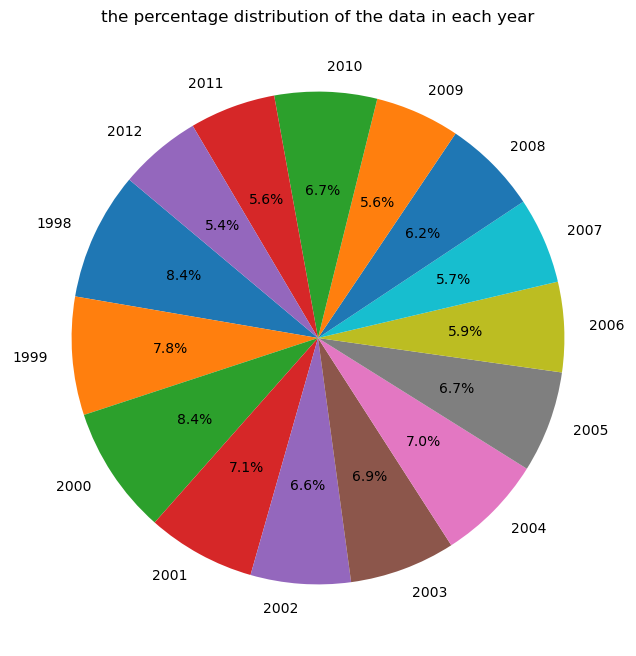

In [9]:
yearly_prod = data1.groupby('year')['totalprod'].sum()

percent_dist = (yearly_prod / yearly_prod.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(percent_dist, labels=yearly_prod.index, autopct='%1.1f%%', startangle=140)
plt.title('the percentage distribution of the data in each year')
plt.show()

# 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

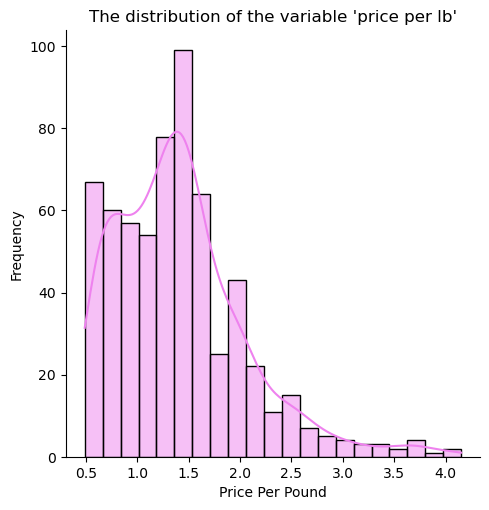

In [8]:
sns.displot(data1["priceperlb"],color='violet',kde=True,common_norm=True)

plt.title("The distribution of the variable 'price per lb'")
plt.xlabel('Price Per Pound')
plt.ylabel('Frequency')
plt.show()

# 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings. 

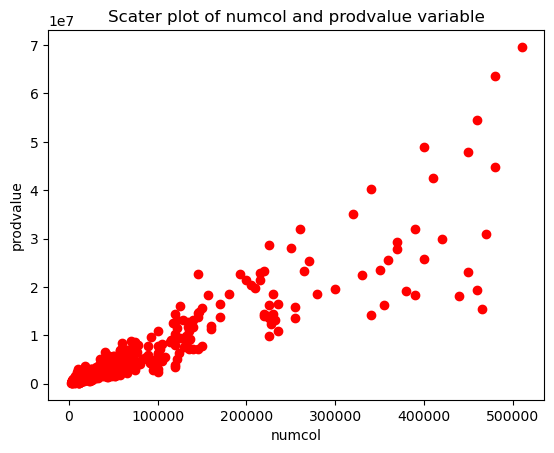

In [192]:
plt.scatter(data1.numcol,data1.prodvalue,c='r',alpha =1)

plt.xlabel("numcol")
plt.ylabel("prodvalue")
plt.title("Scater plot of numcol and prodvalue variable")
plt.show()

 * A scatter plot is a graphical representation of data points in a two-dimensional space,with each data point typically represented by a dot or marker.
* Scatter plots are used to visualize the relationships between two variables 
* it shows the positive linear regression
* and perfectly correlated

# 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings. 

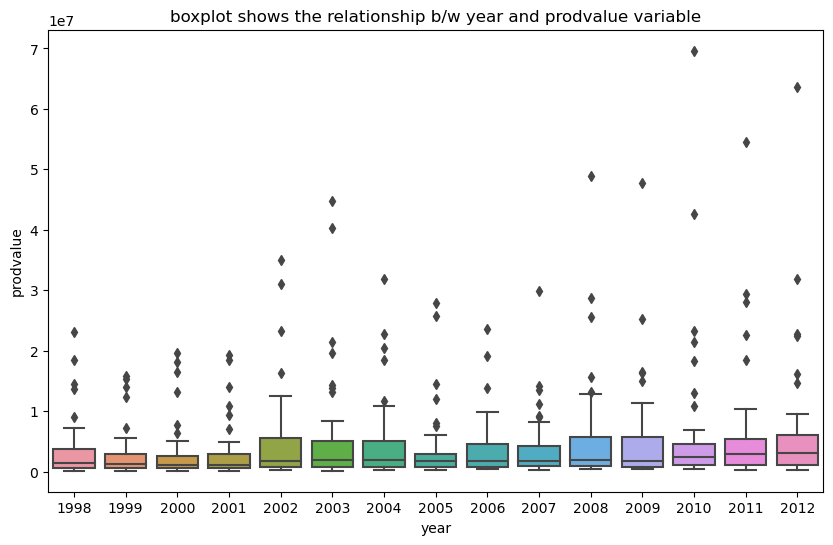

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data1["year"],y=data1["prodvalue"],data = data1,orient='v')

plt.title("boxplot shows the relationship b/w year and prodvalue variable")
plt.show()

 * box plot is a graphical representation of the distribution and summary statistics of a dataset.
 * it shows central tendency,skewness,outliears   
 * And the center line shows the median value   
 * It shows IQR range and out of box plot is the outlier  
 * And deplicate the trend over the year of production

# 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

In [199]:
data1.head(1)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998


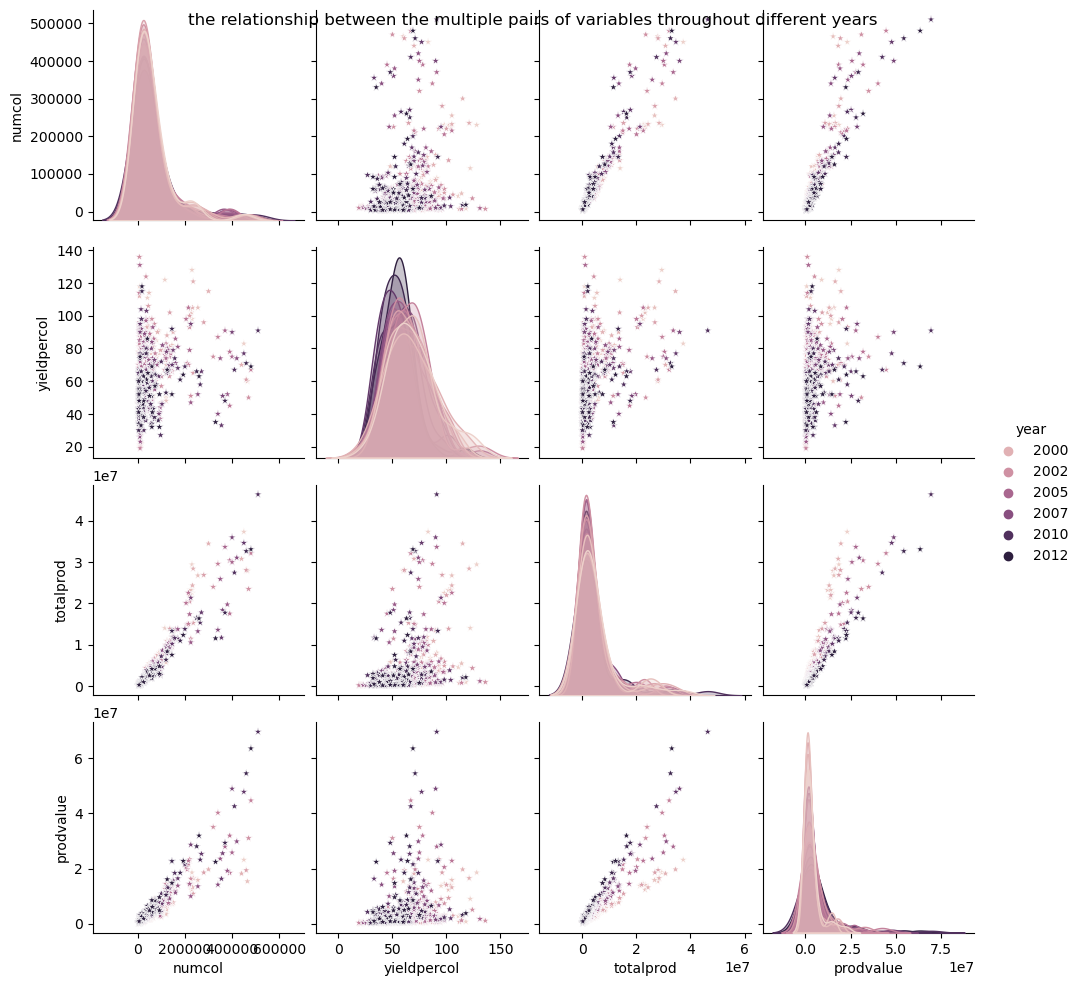

In [20]:
columns = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']
data1_set =data1[columns]

sns.pairplot(data1_set, hue='year', markers="*", diag_kind="kde")
plt.suptitle("the relationship between the multiple pairs of variables throughout different years ")
plt.show()

* Diagonal Plots (Kernel Density Estimation - KDE): The diagonal plots show the distribution of each variable. Observe the shapes of these distributions to understand the data's underlying patterns.
* color shows the yearly changes of 2002 to 2012
* the plot has scatter plot it shows that linearity of model wiith positive or negative.
* and also deplicates the corelation of variables


# 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

In [21]:
correlation_matrix =data1[columns].corr()
correlation_matrix

,numcol,yieldpercol,totalprod,prodvalue,year
numcol,1.000000,0.243515,0.953594,0.912796,0.008709
yieldpercol,0.243515,1.000000,0.396252,0.278977,-0.232092
totalprod,0.953594,0.396252,1.000000,0.907236,-0.055556
prodvalue,0.912796,0.278977,0.907236,1.000000,0.139451
year,0.008709,-0.232092,-0.055556,0.139451,1.000000


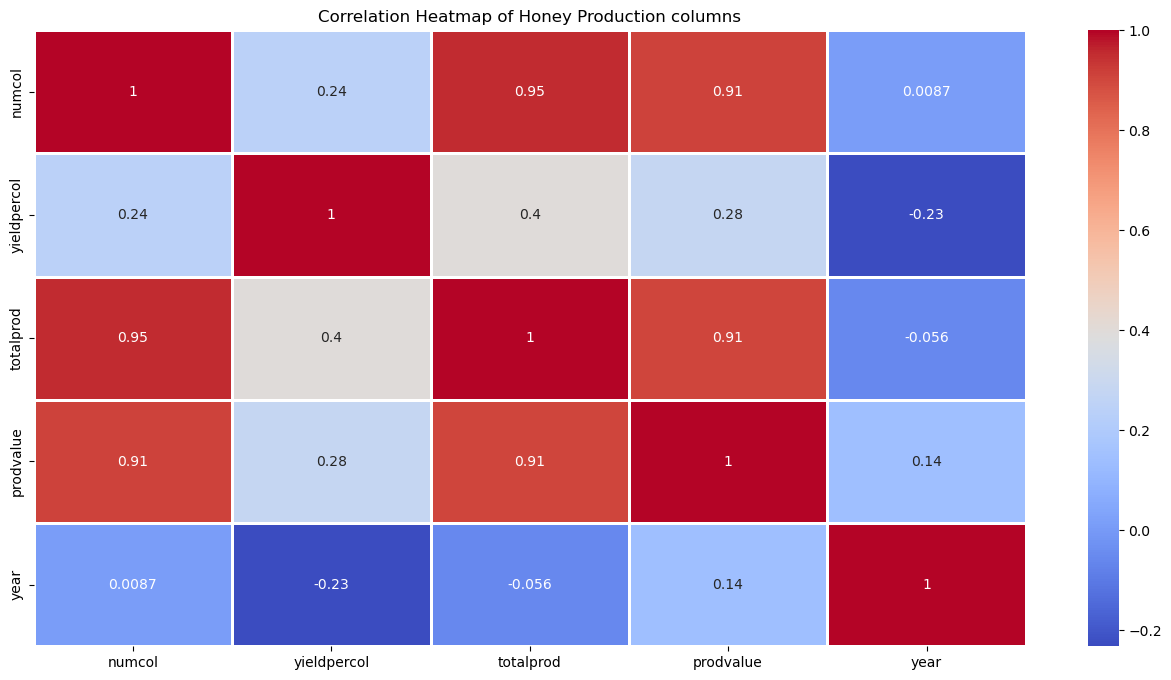

In [27]:
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.8)
plt.title("Correlation Heatmap of Honey Production columns")
plt.show()